In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-music-genre-classification/test (2).csv
/kaggle/input/shai-music-genre-classification/sample_submission (2).csv
/kaggle/input/shai-music-genre-classification/train (1).csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Get the data

In [3]:
train=pd.read_csv('/kaggle/input/shai-music-genre-classification/train (1).csv')
test=pd.read_csv('/kaggle/input/shai-music-genre-classification/test (2).csv')

# Discover the data

In [4]:
train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_in min/ms'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

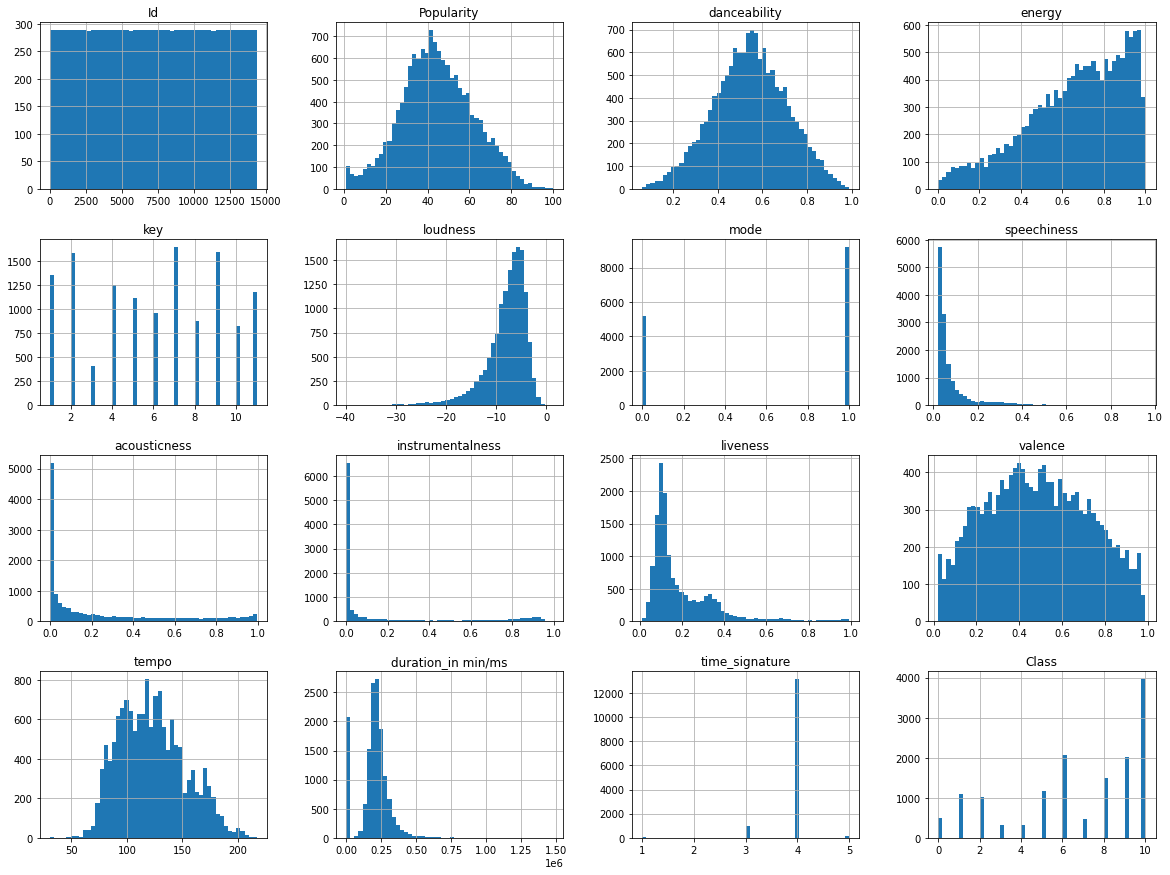

In [6]:
train.hist(bins=50,figsize=(20,15))

In [7]:
train.loc[(train['duration_in min/ms'] < 30)]['duration_in min/ms']
test.loc[(test['duration_in min/ms'] < 30)]['duration_in min/ms']

15      11.612450
25       3.183567
31       3.714217
38       3.358217
44       5.300000
          ...    
3550     4.152883
3560     2.851117
3563     6.843117
3567     2.152000
3588     4.495283
Name: duration_in min/ms, Length: 505, dtype: float64

In [8]:
song_min = train['duration_in min/ms'] < 30
song_min.value_counts()


False    12321
True      2075
Name: duration_in min/ms, dtype: int64

In [9]:
song_min1 = test['duration_in min/ms'] < 30
song_min1.value_counts()

False    3095
True      505
Name: duration_in min/ms, dtype: int64

In [10]:
train.loc[song_min,'duration_in min/ms'] = train.loc[song_min,'duration_in min/ms']*60000
test.loc[song_min1,'duration_in min/ms'] = test.loc[song_min1,'duration_in min/ms']*60000

In [11]:
train.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace = True)
test.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace = True)

In [12]:
nan_col = train.columns[train.isnull().any()]
for i in nan_col:
    print(i, train[i].isnull().sum())

Popularity 333
key 1609
instrumentalness 3541


In [13]:
train['Popularity'].fillna(float(train['Popularity'].mean()), inplace=True)
train['key'].fillna(int(train['key'].mean()), inplace=True)
train['instrumentalness'].fillna(float(train['instrumentalness'].mean()), inplace=True)

In [14]:
test['Popularity'].fillna(float(test['Popularity'].mean()), inplace=True)
test['key'].fillna(int(test['key'].mean()), inplace=True)
test['instrumentalness'].fillna(float(test['instrumentalness'].mean()), inplace=True)

<AxesSubplot:>

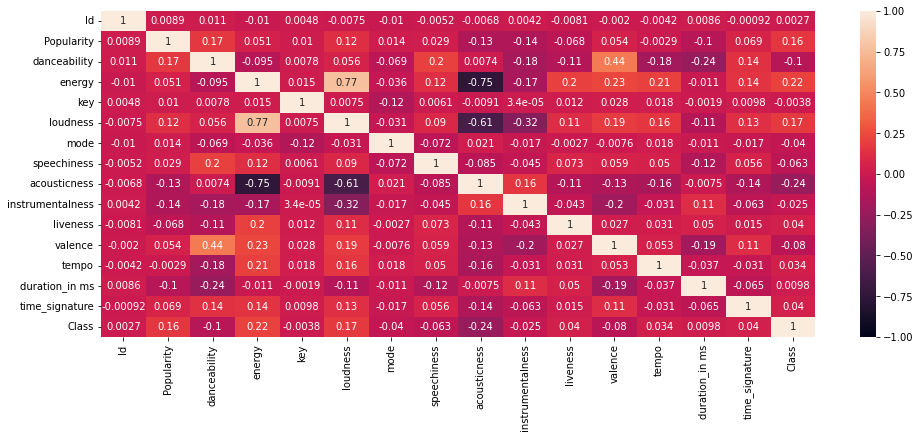

In [15]:
train_cont = train.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

plt.figure(figsize=(16, 6)) # set the output figure size
sns.heatmap(data = train_cont.corr(), vmin = -1, vmax = 1, annot = True) 

# prepare the data

In [16]:
train.drop('energy', axis=1, inplace=True)
test.drop('energy', axis=1, inplace=True)

In [17]:
train.drop('Track Name', axis=1, inplace=True)

In [18]:
test.drop('Track Name', axis=1, inplace=True)

In [19]:
train_Id = train["Id"]
test_Id = test["Id"]

In [20]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

Lablening

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Artist Name']= label_encoder.fit_transform(train['Artist Name'])
train['Artist Name'].unique()

array([4260, 6558, 5639, ..., 1396, 6721, 2406])

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test['Artist Name']= label_encoder.fit_transform(test['Artist Name'])
test['Artist Name'].unique()

array([1159, 1205, 1803, ...,  508, 1103, 1435])

In [23]:
train_class = train['Class'].copy()
train = train.drop('Class',axis = 1)

scaling

In [24]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
train_sc=pd.DataFrame(rs.fit_transform(train))
test_sc=pd.DataFrame(rs.transform(test))

In [25]:
from sklearn.ensemble import IsolationForest
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(train_sc)

IsolationForest(contamination=0.2,
                random_state=RandomState(MT19937) at 0x7F1C0CD6D7C0)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_sc, train_class, random_state=42)

# Boosting

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.4745762711864407

In [28]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train, y_train)
y_pred = cat_clf.predict(X_test)
accuracy_score(y_test, y_pred)

Learning rate set to 0.089335
0:	learn: 2.2642829	total: 86.1ms	remaining: 1m 26s
1:	learn: 2.1663741	total: 112ms	remaining: 56s
2:	learn: 2.0893859	total: 138ms	remaining: 45.8s
3:	learn: 2.0186152	total: 163ms	remaining: 40.5s
4:	learn: 1.9647209	total: 188ms	remaining: 37.3s
5:	learn: 1.9163781	total: 216ms	remaining: 35.7s
6:	learn: 1.8758278	total: 240ms	remaining: 34s
7:	learn: 1.8424909	total: 265ms	remaining: 32.8s
8:	learn: 1.8192149	total: 288ms	remaining: 31.8s
9:	learn: 1.7882434	total: 313ms	remaining: 30.9s
10:	learn: 1.7628594	total: 338ms	remaining: 30.4s
11:	learn: 1.7406816	total: 363ms	remaining: 29.9s
12:	learn: 1.7174123	total: 388ms	remaining: 29.4s
13:	learn: 1.6956166	total: 412ms	remaining: 29s
14:	learn: 1.6743507	total: 439ms	remaining: 28.9s
15:	learn: 1.6568394	total: 464ms	remaining: 28.6s
16:	learn: 1.6406376	total: 488ms	remaining: 28.2s
17:	learn: 1.6245575	total: 512ms	remaining: 28s
18:	learn: 1.6101477	total: 536ms	remaining: 27.7s
19:	learn: 1.5977

0.48235621005834955

# Voting

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [30]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale",probability=True, random_state=42)
knn_clf = KNeighborsClassifier()

In [31]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),
                ('knn',knn_clf),('xgb',xgb_clf),('cat',cat_clf)],
    voting='soft')

In [32]:
voting_clf.fit(X_train, y_train)

Learning rate set to 0.089335
0:	learn: 2.2642829	total: 28ms	remaining: 28s
1:	learn: 2.1663741	total: 52.6ms	remaining: 26.2s
2:	learn: 2.0893859	total: 77.7ms	remaining: 25.8s
3:	learn: 2.0186152	total: 103ms	remaining: 25.6s
4:	learn: 1.9647209	total: 127ms	remaining: 25.4s
5:	learn: 1.9163781	total: 153ms	remaining: 25.3s
6:	learn: 1.8758278	total: 177ms	remaining: 25.2s
7:	learn: 1.8424909	total: 203ms	remaining: 25.2s
8:	learn: 1.8192149	total: 234ms	remaining: 25.8s
9:	learn: 1.7882434	total: 262ms	remaining: 25.9s
10:	learn: 1.7628594	total: 286ms	remaining: 25.7s
11:	learn: 1.7406816	total: 310ms	remaining: 25.6s
12:	learn: 1.7174123	total: 335ms	remaining: 25.4s
13:	learn: 1.6956166	total: 359ms	remaining: 25.3s
14:	learn: 1.6743507	total: 382ms	remaining: 25.1s
15:	learn: 1.6568394	total: 408ms	remaining: 25.1s
16:	learn: 1.6406376	total: 434ms	remaining: 25.1s
17:	learn: 1.6245575	total: 460ms	remaining: 25.1s
18:	learn: 1.6101477	total: 484ms	remaining: 25s
19:	learn: 1.5

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            e...
                                            learning_rate=0.300000012,
                                            max_bin=256, max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                       

In [33]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.44845790497360377
RandomForestClassifier 0.450402889691581
SVC 0.4659627674353987
KNeighborsClassifier 0.3639899972214504
Learning rate set to 0.089335
0:	learn: 2.2642829	total: 26.2ms	remaining: 26.1s
1:	learn: 2.1663741	total: 51.9ms	remaining: 25.9s
2:	learn: 2.0893859	total: 77ms	remaining: 25.6s
3:	learn: 2.0186152	total: 102ms	remaining: 25.3s
4:	learn: 1.9647209	total: 127ms	remaining: 25.2s
5:	learn: 1.9163781	total: 151ms	remaining: 25.1s
6:	learn: 1.8758278	total: 177ms	remaining: 25s
7:	learn: 1.8424909	total: 203ms	remaining: 25.1s
8:	learn: 1.8192149	total: 234ms	remaining: 25.8s
9:	learn: 1.7882434	total: 265ms	remaining: 26.2s
10:	learn: 1.7628594	total: 289ms	remaining: 25.9s
11:	learn: 1.7406816	total: 314ms	remaining: 25.8s
12:	learn: 1.7174123	total: 339ms	remaining: 25.7s
13:	learn: 1.6956166	total: 364ms	remaining: 25.6s
14:	learn: 1.6743507	total: 389ms	remaining: 25.5s
15:	learn: 1.6568394	total: 417ms	remaining: 25.6s
16:	learn: 1.6406376	t

# Stacking

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('knn',knn_clf),('xgb',xgb_clf),('cat',cat_clf)]

st_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
st_clf.fit(X_train, y_train).score(X_test, y_test)

Learning rate set to 0.089335
0:	learn: 2.2642829	total: 26.9ms	remaining: 26.9s
1:	learn: 2.1663741	total: 52.7ms	remaining: 26.3s
2:	learn: 2.0893859	total: 77.7ms	remaining: 25.8s
3:	learn: 2.0186152	total: 102ms	remaining: 25.5s
4:	learn: 1.9647209	total: 127ms	remaining: 25.3s
5:	learn: 1.9163781	total: 153ms	remaining: 25.3s
6:	learn: 1.8758278	total: 178ms	remaining: 25.2s
7:	learn: 1.8424909	total: 205ms	remaining: 25.4s
8:	learn: 1.8192149	total: 237ms	remaining: 26.1s
9:	learn: 1.7882434	total: 269ms	remaining: 26.6s
10:	learn: 1.7628594	total: 293ms	remaining: 26.3s
11:	learn: 1.7406816	total: 317ms	remaining: 26.1s
12:	learn: 1.7174123	total: 342ms	remaining: 26s
13:	learn: 1.6956166	total: 367ms	remaining: 25.8s
14:	learn: 1.6743507	total: 391ms	remaining: 25.7s
15:	learn: 1.6568394	total: 418ms	remaining: 25.7s
16:	learn: 1.6406376	total: 442ms	remaining: 25.6s
17:	learn: 1.6245575	total: 467ms	remaining: 25.5s
18:	learn: 1.6101477	total: 492ms	remaining: 25.4s
19:	learn:

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Learning rate set to 0.088324
0:	learn: 2.2730634	total: 23.4ms	remaining: 23.4s
1:	learn: 2.1746602	total: 48.4ms	remaining: 24.1s
2:	learn: 2.0973544	total: 70.5ms	remaining: 23.4s
3:	learn: 2.0294514	total: 94.1ms	remaining: 23.4s
4:	learn: 1.9737295	total: 118ms	remaining: 23.4s
5:	learn: 1.9304774	total: 140ms	remaining: 23.3s
6:	learn: 1.8907694	total: 163ms	remaining: 23.1s
7:	learn: 1.8558423	total: 186ms	remaining: 23.1s
8:	learn: 1.8309792	total: 213ms	remaining: 23.5s
9:	learn: 1.8020879	total: 240ms	remaining: 23.8s
10:	learn: 1.7758298	total: 268ms	remaining: 24.1s
11:	learn: 1.7519239	total: 295ms	remaining: 24.3s
12:	learn: 1.7309282	total: 318ms	remaining: 24.2s
13:	learn: 1.7090956	total: 343ms	remaining: 24.2s
14:	learn: 1.6874872	total: 366ms	remaining: 24s
15:	learn: 1.6660476	total: 388ms	remaining: 23.9s
16:	learn: 1.6514305	total: 415ms	remaining: 24s
17:	learn: 1.6385017	total: 442ms	remaining: 24.1s
18:	learn: 1.6234226	total: 466ms	remaining: 24s
19:	learn: 1.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5218116143373159

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(st_clf, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Learning rate set to 0.087507
0:	learn: 2.2631641	total: 23.8ms	remaining: 23.7s
1:	learn: 2.1674179	total: 47.1ms	remaining: 23.5s
2:	learn: 2.0971168	total: 67.7ms	remaining: 22.5s
3:	learn: 2.0353061	total: 88.4ms	remaining: 22s
4:	learn: 1.9823919	total: 109ms	remaining: 21.7s
5:	learn: 1.9428041	total: 130ms	remaining: 21.5s
6:	learn: 1.8998010	total: 151ms	remaining: 21.4s
7:	learn: 1.8624051	total: 172ms	remaining: 21.4s
8:	learn: 1.8367460	total: 193ms	remaining: 21.2s
9:	learn: 1.8109351	total: 216ms	remaining: 21.4s
10:	learn: 1.7829388	total: 237ms	remaining: 21.3s
11:	learn: 1.7607632	total: 258ms	remaining: 21.2s
12:	learn: 1.7377438	total: 278ms	remaining: 21.1s
13:	learn: 1.7171244	total: 299ms	remaining: 21.1s
14:	learn: 1.6967604	total: 321ms	remaining: 21.1s
15:	learn: 1.6746465	total: 342ms	remaining: 21s
16:	learn: 1.6585291	total: 364ms	remaining: 21.1s
17:	learn: 1.6424544	total: 384ms	remaining: 21s
18:	learn: 1.6296058	total: 405ms	remaining: 20.9s
19:	learn: 1.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Learning rate set to 0.086516
0:	learn: 2.2752617	total: 23.3ms	remaining: 23.3s
1:	learn: 2.1836302	total: 43.2ms	remaining: 21.5s
2:	learn: 2.1104885	total: 62ms	remaining: 20.6s
3:	learn: 2.0436714	total: 81.4ms	remaining: 20.3s
4:	learn: 1.9917348	total: 102ms	remaining: 20.4s
5:	learn: 1.9449477	total: 122ms	remaining: 20.2s
6:	learn: 1.9117298	total: 141ms	remaining: 20.1s
7:	learn: 1.8748789	total: 161ms	remaining: 19.9s
8:	learn: 1.8518056	total: 180ms	remaining: 19.8s
9:	learn: 1.8199915	total: 199ms	remaining: 19.7s
10:	learn: 1.7920554	total: 222ms	remaining: 20s
11:	learn: 1.7643570	total: 243ms	remaining: 20s
12:	learn: 1.7417454	total: 265ms	remaining: 20.1s
13:	learn: 1.7214804	total: 298ms	remaining: 21s
14:	learn: 1.6993187	total: 324ms	remaining: 21.3s
15:	learn: 1.6776092	total: 348ms	remaining: 21.4s
16:	learn: 1.6625653	total: 370ms	remaining: 21.4s
17:	learn: 1.6474620	total: 393ms	remaining: 21.4s
18:	learn: 1.6345457	total: 415ms	remaining: 21.4s
19:	learn: 1.62

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Learning rate set to 0.087507
0:	learn: 2.2699658	total: 27.5ms	remaining: 27.5s
1:	learn: 2.1697416	total: 49.6ms	remaining: 24.7s
2:	learn: 2.0924391	total: 71ms	remaining: 23.6s
3:	learn: 2.0302049	total: 92ms	remaining: 22.9s
4:	learn: 1.9804167	total: 113ms	remaining: 22.4s
5:	learn: 1.9422024	total: 133ms	remaining: 22.1s
6:	learn: 1.9071378	total: 155ms	remaining: 21.9s
7:	learn: 1.8696783	total: 177ms	remaining: 21.9s
8:	learn: 1.8442436	total: 198ms	remaining: 21.8s
9:	learn: 1.8136399	total: 226ms	remaining: 22.3s
10:	learn: 1.7864753	total: 251ms	remaining: 22.6s
11:	learn: 1.7626450	total: 277ms	remaining: 22.8s
12:	learn: 1.7421369	total: 303ms	remaining: 23s
13:	learn: 1.7217750	total: 329ms	remaining: 23.1s
14:	learn: 1.7020236	total: 354ms	remaining: 23.3s
15:	learn: 1.6805389	total: 381ms	remaining: 23.4s
16:	learn: 1.6663513	total: 417ms	remaining: 24.1s
17:	learn: 1.6512246	total: 442ms	remaining: 24.1s
18:	learn: 1.6378769	total: 463ms	remaining: 23.9s
19:	learn: 1.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Learning rate set to 0.086516
0:	learn: 2.2803128	total: 20.8ms	remaining: 20.8s
1:	learn: 2.1868522	total: 39.7ms	remaining: 19.8s
2:	learn: 2.1170481	total: 58.4ms	remaining: 19.4s
3:	learn: 2.0582243	total: 77.1ms	remaining: 19.2s
4:	learn: 2.0035324	total: 96.1ms	remaining: 19.1s
5:	learn: 1.9647334	total: 116ms	remaining: 19.2s
6:	learn: 1.9243856	total: 135ms	remaining: 19.2s
7:	learn: 1.8886547	total: 154ms	remaining: 19.1s
8:	learn: 1.8664470	total: 173ms	remaining: 19.1s
9:	learn: 1.8348301	total: 193ms	remaining: 19.1s
10:	learn: 1.8054527	total: 215ms	remaining: 19.3s
11:	learn: 1.7832696	total: 239ms	remaining: 19.7s
12:	learn: 1.7592929	total: 265ms	remaining: 20.1s
13:	learn: 1.7390479	total: 288ms	remaining: 20.3s
14:	learn: 1.7201049	total: 311ms	remaining: 20.5s
15:	learn: 1.7001294	total: 336ms	remaining: 20.7s
16:	learn: 1.6805302	total: 361ms	remaining: 20.9s
17:	learn: 1.6642732	total: 385ms	remaining: 21s
18:	learn: 1.6502609	total: 409ms	remaining: 21.1s
19:	lear

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Learning rate set to 0.087507
0:	learn: 2.2717957	total: 22.4ms	remaining: 22.4s
1:	learn: 2.1790034	total: 43.5ms	remaining: 21.7s
2:	learn: 2.1079491	total: 64.7ms	remaining: 21.5s
3:	learn: 2.0404074	total: 85.4ms	remaining: 21.3s
4:	learn: 1.9861086	total: 107ms	remaining: 21.2s
5:	learn: 1.9372686	total: 130ms	remaining: 21.5s
6:	learn: 1.8968852	total: 159ms	remaining: 22.6s
7:	learn: 1.8573649	total: 180ms	remaining: 22.3s
8:	learn: 1.8280011	total: 201ms	remaining: 22.2s
9:	learn: 1.7986611	total: 227ms	remaining: 22.5s
10:	learn: 1.7720715	total: 253ms	remaining: 22.8s
11:	learn: 1.7469349	total: 280ms	remaining: 23s
12:	learn: 1.7233207	total: 305ms	remaining: 23.1s
13:	learn: 1.7013712	total: 331ms	remaining: 23.3s
14:	learn: 1.6837558	total: 357ms	remaining: 23.4s
15:	learn: 1.6633670	total: 383ms	remaining: 23.6s
16:	learn: 1.6480259	total: 409ms	remaining: 23.6s
17:	learn: 1.6347219	total: 436ms	remaining: 23.8s
18:	learn: 1.6212015	total: 463ms	remaining: 23.9s
19:	learn

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Learning rate set to 0.086516
0:	learn: 2.2703750	total: 18.3ms	remaining: 18.3s
1:	learn: 2.1809978	total: 36.3ms	remaining: 18.1s
2:	learn: 2.1121996	total: 55.6ms	remaining: 18.5s
3:	learn: 2.0496524	total: 74.1ms	remaining: 18.5s
4:	learn: 1.9947156	total: 92.6ms	remaining: 18.4s
5:	learn: 1.9558779	total: 112ms	remaining: 18.5s
6:	learn: 1.9136122	total: 131ms	remaining: 18.5s
7:	learn: 1.8765767	total: 149ms	remaining: 18.5s
8:	learn: 1.8518322	total: 168ms	remaining: 18.5s
9:	learn: 1.8211460	total: 187ms	remaining: 18.5s
10:	learn: 1.7917435	total: 209ms	remaining: 18.8s
11:	learn: 1.7685721	total: 246ms	remaining: 20.2s
12:	learn: 1.7445930	total: 279ms	remaining: 21.2s
13:	learn: 1.7254939	total: 302ms	remaining: 21.3s
14:	learn: 1.7041492	total: 325ms	remaining: 21.3s
15:	learn: 1.6877255	total: 348ms	remaining: 21.4s
16:	learn: 1.6718451	total: 371ms	remaining: 21.4s
17:	learn: 1.6529883	total: 394ms	remaining: 21.5s
18:	learn: 1.6398229	total: 417ms	remaining: 21.5s
19:	le

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


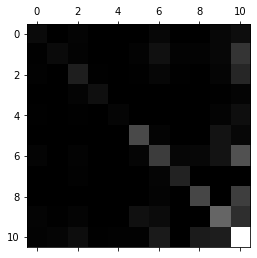

In [36]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [38]:
precision_score(y_train, y_pred,pos_label='positive',average='micro')

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


0.5005094007594703

In [39]:
recall_score(y_train, y_pred,pos_label='positive',average='micro')

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


0.5005094007594703

In [40]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred,pos_label='positive',average='micro')

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


0.5005094007594703

f1= 0.50

In [41]:
c=st_clf.predict(test_sc)

In [42]:
predictions = pd.Series(c)

In [43]:
pred = pd.DataFrame({"Id":test_Id,"Class":predictions})
pred.head()

,Id,Class
0,14397,9
1,14398,6
2,14399,9
3,14400,10
4,14401,5


In [44]:
pred.to_csv("submission.csv",index=False)